In [12]:
import os

folder_path = "rawdata" 

# Verifying that the folder exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"❌ Folder not found: {folder_path}. Check path!")

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

print(f"✅ Found {len(csv_files)} CSV files in '{folder_path}':")
print(csv_files)

✅ Found 20 CSV files in 'rawdata':
['fuelDensity.csv', 'fuelTemp.csv', 'fuelVolumeFlowRate.csv', 'inclinometer-raw.csv', 'latitude.csv', 'level1median.csv', 'level2median.csv', 'longitude.csv', 'longitudinalWaterSpeed.csv', 'portPitch.csv', 'portRudder.csv', 'speedKmh.csv', 'speedKnots.csv', 'starboardPitch.csv', 'starboardRudder.csv', 'trackDegreeMagnetic.csv', 'trackDegreeTrue.csv', 'trueHeading.csv', 'windAngle.csv', 'windSpeed.csv']


In [23]:
import pandas as pd

# Loading all CSV files into a dictionary of DataFrames

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}
print("Loaded files:", list(dataframes.keys()))

# Displaying the first few rows of a sample CSV 
sample_file = csv_files[0] 
print(f"\n✅ Sample data from {sample_file}:")
display(dataframes[sample_file].head())

Loaded files: ['fuelDensity.csv', 'fuelTemp.csv', 'fuelVolumeFlowRate.csv', 'inclinometer-raw.csv', 'latitude.csv', 'level1median.csv', 'level2median.csv', 'longitude.csv', 'longitudinalWaterSpeed.csv', 'portPitch.csv', 'portRudder.csv', 'speedKmh.csv', 'speedKnots.csv', 'starboardPitch.csv', 'starboardRudder.csv', 'trackDegreeMagnetic.csv', 'trackDegreeTrue.csv', 'trueHeading.csv', 'windAngle.csv', 'windSpeed.csv']

✅ Sample data from fuelDensity.csv:


,634019142119225390,0.9471087
0,634019142129597610,0.947110
1,634019142139821660,0.947114
2,634019142150036040,0.947104
3,634019212935606850,0.938305
4,634019212945820680,0.938173


In [43]:
for file_name, df in dataframes.items():
    print(f"📌 Checking first column in {file_name}:")
    print("Data Type:", df.iloc[:, 0].dtype)
    print("First 5 Values:\n", df.iloc[:, 0].head(), "\n")

📌 Checking first column in fuelDensity.csv:
Data Type: int64
First 5 Values:
 0    634019142129597610
1    634019142139821660
2    634019142150036040
3    634019212935606850
4    634019212945820680
Name: 634019142119225390, dtype: int64 

📌 Checking first column in fuelTemp.csv:
Data Type: int64
First 5 Values:
 0    634019142129597610
1    634019142139821660
2    634019142150036040
3    634019212935606850
4    634019212945820680
Name: 634019142119225390, dtype: int64 

📌 Checking first column in fuelVolumeFlowRate.csv:
Data Type: int64
First 5 Values:
 0    634019142129597610
1    634019142139821660
2    634019142150036040
3    634019212935606850
4    634019212945820680
Name: 634019142119225390, dtype: int64 

📌 Checking first column in inclinometer-raw.csv:
Data Type: int64
First 5 Values:
 0    634018095135792430
1    634018095140650320
2    634018095145505050
3    634018095150362220
4    634018095155209600
Name: 634018095130928380, dtype: int64 

📌 Checking first column in latitude

In [45]:
# Renaming the first column to 'timestamp' in all DataFrames
for file_name, df in dataframes.items():
    df.rename(columns={df.columns[0]: "timestamp"}, inplace=True)
    print(f"✅ Renamed first column in {file_name} to 'timestamp'")

✅ Renamed first column in fuelDensity.csv to 'timestamp'
✅ Renamed first column in fuelTemp.csv to 'timestamp'
✅ Renamed first column in fuelVolumeFlowRate.csv to 'timestamp'
✅ Renamed first column in inclinometer-raw.csv to 'timestamp'
✅ Renamed first column in latitude.csv to 'timestamp'
✅ Renamed first column in level1median.csv to 'timestamp'
✅ Renamed first column in level2median.csv to 'timestamp'
✅ Renamed first column in longitude.csv to 'timestamp'
✅ Renamed first column in longitudinalWaterSpeed.csv to 'timestamp'
✅ Renamed first column in portPitch.csv to 'timestamp'
✅ Renamed first column in portRudder.csv to 'timestamp'
✅ Renamed first column in speedKmh.csv to 'timestamp'
✅ Renamed first column in speedKnots.csv to 'timestamp'
✅ Renamed first column in starboardPitch.csv to 'timestamp'
✅ Renamed first column in starboardRudder.csv to 'timestamp'
✅ Renamed first column in trackDegreeMagnetic.csv to 'timestamp'
✅ Renamed first column in trackDegreeTrue.csv to 'timestamp'
✅ 

In [47]:
import datetime

# Function to convert .NET ticks to UTC datetime
def dotnet_ticks_to_utc(tick_value):
    try:
        unix_time = (int(tick_value) - 621355968000000000) / 10**7  # Convert to UNIX timestamp
        return datetime.datetime.fromtimestamp(unix_time, datetime.UTC)  # Convert to UTC datetime
    except (ValueError, TypeError):
        return None 

# Applying conversion to all datasets
for file_name, df in dataframes.items():
    df["timestamp"] = df["timestamp"].apply(dotnet_ticks_to_utc)  # Convert timestamps

for file_name, df in dataframes.items():
    print(f"📌 Sample converted timestamps for {file_name}:")
    display(df["timestamp"].head()) 

📌 Sample converted timestamps for fuelDensity.csv:


0   2010-02-16 10:50:12.959761+00:00
1   2010-02-16 10:50:13.982166+00:00
2   2010-02-16 10:50:15.003604+00:00
3   2010-02-16 12:48:13.560685+00:00
4   2010-02-16 12:48:14.582068+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for fuelTemp.csv:


0   2010-02-16 10:50:12.959761+00:00
1   2010-02-16 10:50:13.982166+00:00
2   2010-02-16 10:50:15.003604+00:00
3   2010-02-16 12:48:13.560685+00:00
4   2010-02-16 12:48:14.582068+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for fuelVolumeFlowRate.csv:


0   2010-02-16 10:50:12.959761+00:00
1   2010-02-16 10:50:13.982166+00:00
2   2010-02-16 10:50:15.003604+00:00
3   2010-02-16 12:48:13.560685+00:00
4   2010-02-16 12:48:14.582068+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for inclinometer-raw.csv:


0   2010-02-15 05:45:13.579243+00:00
1   2010-02-15 05:45:14.065032+00:00
2   2010-02-15 05:45:14.550505+00:00
3   2010-02-15 05:45:15.036222+00:00
4   2010-02-15 05:45:15.520960+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for latitude.csv:


0   2010-02-15 05:45:13.789892+00:00
1   2010-02-15 05:45:14.653416+00:00
2   2010-02-15 05:45:15.758745+00:00
3   2010-02-15 05:45:15.858807+00:00
4   2010-02-15 05:45:15.866751+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for level1median.csv:


0   2010-02-15 05:45:13.151748+00:00
1   2010-02-15 05:45:13.485081+00:00
2   2010-02-15 05:45:13.818415+00:00
3   2010-02-15 05:45:14.151748+00:00
4   2010-02-15 05:45:14.485081+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for level2median.csv:


0   2010-02-15 05:45:13.151748+00:00
1   2010-02-15 05:45:13.485081+00:00
2   2010-02-15 05:45:13.818415+00:00
3   2010-02-15 05:45:14.151748+00:00
4   2010-02-15 05:45:14.485081+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for longitude.csv:


0   2010-02-15 05:45:13.789892+00:00
1   2010-02-15 05:45:14.653416+00:00
2   2010-02-15 05:45:15.758745+00:00
3   2010-02-15 05:45:15.858807+00:00
4   2010-02-15 05:45:15.866751+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for longitudinalWaterSpeed.csv:


0   2010-02-15 05:45:18.947037+00:00
1   2010-02-15 05:45:22.032048+00:00
2   2010-02-15 05:45:25.191158+00:00
3   2010-02-15 05:45:28.332335+00:00
4   2010-02-15 05:45:31.481462+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for portPitch.csv:


0   2010-02-15 05:45:14.558803+00:00
1   2010-02-15 05:45:15.559428+00:00
2   2010-02-15 05:45:16.560551+00:00
3   2010-02-15 05:45:17.561121+00:00
4   2010-02-15 05:45:18.562107+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for portRudder.csv:


0   2010-02-15 05:45:14.558803+00:00
1   2010-02-15 05:45:15.559428+00:00
2   2010-02-15 05:45:16.560551+00:00
3   2010-02-15 05:45:17.561121+00:00
4   2010-02-15 05:45:18.562107+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for speedKmh.csv:


0   2010-02-15 05:45:13.916874+00:00
1   2010-02-15 05:45:14.977141+00:00
2   2010-02-15 05:45:16.029602+00:00
3   2010-02-15 05:45:16.083526+00:00
4   2010-02-15 05:45:17.973483+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for speedKnots.csv:


0   2010-02-15 05:45:13.916874+00:00
1   2010-02-15 05:45:14.977141+00:00
2   2010-02-15 05:45:16.029602+00:00
3   2010-02-15 05:45:16.083526+00:00
4   2010-02-15 05:45:17.973483+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for starboardPitch.csv:


0   2010-02-15 05:45:14.558803+00:00
1   2010-02-15 05:45:15.559428+00:00
2   2010-02-15 05:45:16.560551+00:00
3   2010-02-15 05:45:17.561121+00:00
4   2010-02-15 05:45:18.562107+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for starboardRudder.csv:


0   2010-02-15 05:45:14.558803+00:00
1   2010-02-15 05:45:15.559428+00:00
2   2010-02-15 05:45:16.560551+00:00
3   2010-02-15 05:45:17.561121+00:00
4   2010-02-15 05:45:18.562107+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for trackDegreeMagnetic.csv:


0   2010-02-15 05:45:14.977141+00:00
1   2010-02-15 05:45:16.029602+00:00
2   2010-02-15 05:45:16.083526+00:00
3   2010-02-15 05:45:17.973483+00:00
4   2010-02-15 05:45:18.088308+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for trackDegreeTrue.csv:


0   2010-02-15 05:45:14.977141+00:00
1   2010-02-15 05:45:16.029602+00:00
2   2010-02-15 05:45:16.083526+00:00
3   2010-02-15 05:45:17.973483+00:00
4   2010-02-15 05:45:18.088308+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for trueHeading.csv:


0   2010-02-15 05:45:15.298960+00:00
1   2010-02-15 05:45:16.499288+00:00
2   2010-02-15 05:45:17.698530+00:00
3   2010-02-15 05:45:18.898842+00:00
4   2010-02-15 05:45:20.099155+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for windAngle.csv:


0   2010-02-15 05:45:16.849119+00:00
1   2010-02-15 05:45:18.848925+00:00
2   2010-02-15 05:45:20.848747+00:00
3   2010-02-15 05:45:22.846572+00:00
4   2010-02-15 05:45:24.846390+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

📌 Sample converted timestamps for windSpeed.csv:


0   2010-02-15 05:45:16.849119+00:00
1   2010-02-15 05:45:18.848925+00:00
2   2010-02-15 05:45:20.848747+00:00
3   2010-02-15 05:45:22.846572+00:00
4   2010-02-15 05:45:24.846390+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [119]:
# Define a mapping to rename columns based on the dataset filenames
dataset_column_map = {
    "fuelDensity.csv": "Fuel_Density",
    "fuelTemp.csv": "Fuel_Temperature",
    "fuelVolumeFlowRate.csv": "Fuel_FlowRate",
    "inclinometer-raw.csv": "Trim_Angle",
    "latitude.csv": "Latitude",
    "longitude.csv": "Longitude",
    "level1median.csv": "Port_Tank_Level",
    "level2median.csv": "Starboard_Tank_Level",
    "longitudinalWaterSpeed.csv": "Water_Speed",
    "portPitch.csv": "Port_Pitch",
    "portRudder.csv": "Port_Rudder",
    "speedKmh.csv": "Speed_kmh",
    "speedKnots.csv": "Speed_knots",
    "starboardPitch.csv": "Starboard_Pitch",
    "starboardRudder.csv": "Starboard_Rudder",
    "trackDegreeMagnetic.csv": "Track_Magnetic",
    "trackDegreeTrue.csv": "Track_True",
    "trueHeading.csv": "Heading_True",
    "windAngle.csv": "Wind_Angle",
    "windSpeed.csv": "Wind_Speed"
}

# Processing each dataset
for file_name, df in dataframes.items():
    # Convert timestamp column to datetime format
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    if file_name in dataset_column_map:
        df.rename(columns={df.columns[1]: dataset_column_map[file_name]}, inplace=True)

    # Converting the column to numeric format, replacing errors with NaN
    df[dataset_column_map[file_name]] = pd.to_numeric(df[dataset_column_map[file_name]], errors="coerce")

    # Resampling data to hourly intervals and compute the mean
    df = df.set_index("timestamp").resample("h").mean().reset_index()

    dataframes[file_name] = df

print("✅ Data successfully renamed, converted, and resampled to hourly intervals!")

✅ Data successfully renamed, converted, and resampled to hourly intervals!


In [51]:
# Display sample rows from each dataset after resampling
for file_name, df in dataframes.items():
    print(f"📌 Preview of hourly resampled data from {file_name}:")
    
    display(df.head())

    print("-" * 50) 

📌 Preview of hourly resampled data from fuelDensity.csv:


,timestamp,Fuel_Density
0,2010-02-16 10:00:00+00:00,0.947109
1,2010-02-16 11:00:00+00:00,NaN
2,2010-02-16 12:00:00+00:00,0.931464
3,2010-02-16 13:00:00+00:00,0.926195
4,2010-02-16 14:00:00+00:00,0.925123


--------------------------------------------------
📌 Preview of hourly resampled data from fuelTemp.csv:


,timestamp,Fuel_Temperature
0,2010-02-16 10:00:00+00:00,62.202690
1,2010-02-16 11:00:00+00:00,NaN
2,2010-02-16 12:00:00+00:00,92.897298
3,2010-02-16 13:00:00+00:00,97.423365
4,2010-02-16 14:00:00+00:00,98.076956


--------------------------------------------------
📌 Preview of hourly resampled data from fuelVolumeFlowRate.csv:


,timestamp,Fuel_FlowRate
0,2010-02-16 10:00:00+00:00,0.000000
1,2010-02-16 11:00:00+00:00,NaN
2,2010-02-16 12:00:00+00:00,0.470666
3,2010-02-16 13:00:00+00:00,0.501743
4,2010-02-16 14:00:00+00:00,0.499402


--------------------------------------------------
📌 Preview of hourly resampled data from inclinometer-raw.csv:


,timestamp,Trim_Angle
0,2010-02-15 05:00:00+00:00,357.368615
1,2010-02-15 06:00:00+00:00,357.217611
2,2010-02-15 07:00:00+00:00,357.229154
3,2010-02-15 08:00:00+00:00,357.260413
4,2010-02-15 09:00:00+00:00,357.220845


--------------------------------------------------
📌 Preview of hourly resampled data from latitude.csv:


,timestamp,Latitude
0,2010-02-15 05:00:00+00:00,NaN
1,2010-02-15 06:00:00+00:00,NaN
2,2010-02-15 07:00:00+00:00,NaN
3,2010-02-15 08:00:00+00:00,NaN
4,2010-02-15 09:00:00+00:00,NaN


--------------------------------------------------
📌 Preview of hourly resampled data from level1median.csv:


,timestamp,Port_Tank_Level
0,2010-02-15 05:00:00+00:00,16.689728
1,2010-02-15 06:00:00+00:00,16.796165
2,2010-02-15 07:00:00+00:00,16.668163
3,2010-02-15 08:00:00+00:00,16.570587
4,2010-02-15 09:00:00+00:00,16.604288


--------------------------------------------------
📌 Preview of hourly resampled data from level2median.csv:


,timestamp,Starboard_Tank_Level
0,2010-02-15 05:00:00+00:00,14.327428
1,2010-02-15 06:00:00+00:00,14.434264
2,2010-02-15 07:00:00+00:00,14.438477
3,2010-02-15 08:00:00+00:00,14.711460
4,2010-02-15 09:00:00+00:00,14.699630


--------------------------------------------------
📌 Preview of hourly resampled data from longitude.csv:


,timestamp,Longitude
0,2010-02-15 05:00:00+00:00,NaN
1,2010-02-15 06:00:00+00:00,NaN
2,2010-02-15 07:00:00+00:00,NaN
3,2010-02-15 08:00:00+00:00,NaN
4,2010-02-15 09:00:00+00:00,NaN


--------------------------------------------------
📌 Preview of hourly resampled data from longitudinalWaterSpeed.csv:


,timestamp,Water_Speed
0,2010-02-15 05:00:00+00:00,14.843214
1,2010-02-15 06:00:00+00:00,18.949256
2,2010-02-15 07:00:00+00:00,15.498497
3,2010-02-15 08:00:00+00:00,17.884495
4,2010-02-15 09:00:00+00:00,18.580957


--------------------------------------------------
📌 Preview of hourly resampled data from portPitch.csv:


,timestamp,Port_Pitch
0,2010-02-15 05:00:00+00:00,6.860181
1,2010-02-15 06:00:00+00:00,7.878049
2,2010-02-15 07:00:00+00:00,6.312335
3,2010-02-15 08:00:00+00:00,7.526704
4,2010-02-15 09:00:00+00:00,7.643261


--------------------------------------------------
📌 Preview of hourly resampled data from portRudder.csv:


,timestamp,Port_Rudder
0,2010-02-15 05:00:00+00:00,-0.310833
1,2010-02-15 06:00:00+00:00,-0.047845
2,2010-02-15 07:00:00+00:00,-1.115819
3,2010-02-15 08:00:00+00:00,-0.111356
4,2010-02-15 09:00:00+00:00,-0.068548


--------------------------------------------------
📌 Preview of hourly resampled data from speedKmh.csv:


,timestamp,Speed_kmh
0,2010-02-15 05:00:00+00:00,28.102536
1,2010-02-15 06:00:00+00:00,36.912049
2,2010-02-15 07:00:00+00:00,30.072112
3,2010-02-15 08:00:00+00:00,35.145999
4,2010-02-15 09:00:00+00:00,35.590454


--------------------------------------------------
📌 Preview of hourly resampled data from speedKnots.csv:


,timestamp,Speed_knots
0,2010-02-15 05:00:00+00:00,15.173429
1,2010-02-15 06:00:00+00:00,19.925834
2,2010-02-15 07:00:00+00:00,16.239145
3,2010-02-15 08:00:00+00:00,18.977038
4,2010-02-15 09:00:00+00:00,19.218412


--------------------------------------------------
📌 Preview of hourly resampled data from starboardPitch.csv:


,timestamp,Starboard_Pitch
0,2010-02-15 05:00:00+00:00,6.895003
1,2010-02-15 06:00:00+00:00,7.921501
2,2010-02-15 07:00:00+00:00,5.860213
3,2010-02-15 08:00:00+00:00,7.659914
4,2010-02-15 09:00:00+00:00,7.667956


--------------------------------------------------
📌 Preview of hourly resampled data from starboardRudder.csv:


,timestamp,Starboard_Rudder
0,2010-02-15 05:00:00+00:00,-0.331329
1,2010-02-15 06:00:00+00:00,-0.056097
2,2010-02-15 07:00:00+00:00,1.052951
3,2010-02-15 08:00:00+00:00,0.059164
4,2010-02-15 09:00:00+00:00,-0.035970


--------------------------------------------------
📌 Preview of hourly resampled data from trackDegreeMagnetic.csv:


,timestamp,Track_Magnetic
0,2010-02-15 05:00:00+00:00,125.845143
1,2010-02-15 06:00:00+00:00,59.684993
2,2010-02-15 07:00:00+00:00,288.604528
3,2010-02-15 08:00:00+00:00,172.518690
4,2010-02-15 09:00:00+00:00,214.619255


--------------------------------------------------
📌 Preview of hourly resampled data from trackDegreeTrue.csv:


,timestamp,Track_True
0,2010-02-15 05:00:00+00:00,123.613355
1,2010-02-15 06:00:00+00:00,58.351208
2,2010-02-15 07:00:00+00:00,283.980576
3,2010-02-15 08:00:00+00:00,165.318690
4,2010-02-15 09:00:00+00:00,207.570411


--------------------------------------------------
📌 Preview of hourly resampled data from trueHeading.csv:


,timestamp,Heading_True
0,2010-02-15 05:00:00+00:00,119.144472
1,2010-02-15 06:00:00+00:00,45.593760
2,2010-02-15 07:00:00+00:00,296.012057
3,2010-02-15 08:00:00+00:00,179.484075
4,2010-02-15 09:00:00+00:00,209.151560


--------------------------------------------------
📌 Preview of hourly resampled data from windAngle.csv:


,timestamp,Wind_Angle
0,2010-02-15 05:00:00+00:00,132.898190
1,2010-02-15 06:00:00+00:00,32.672778
2,2010-02-15 07:00:00+00:00,63.019948
3,2010-02-15 08:00:00+00:00,240.914504
4,2010-02-15 09:00:00+00:00,261.811667


--------------------------------------------------
📌 Preview of hourly resampled data from windSpeed.csv:


,timestamp,Wind_Speed
0,2010-02-15 05:00:00+00:00,7.560633
1,2010-02-15 06:00:00+00:00,9.542333
2,2010-02-15 07:00:00+00:00,9.869558
3,2010-02-15 08:00:00+00:00,10.402672
4,2010-02-15 09:00:00+00:00,11.519611


--------------------------------------------------


In [55]:
combined_df = None

# Merging datasets
for file, df in dataframes.items():
    if combined_df is None:
        combined_df = df  # Start with the first dataset
    else:
        combined_df = combined_df.merge(df, on="timestamp", how="outer")  # Outer join to retain all timestamps

# Data is sorted chronologically
combined_df = combined_df.sort_values(by="timestamp").reset_index(drop=True)

print("📌 Sample from the merged dataset:")
display(combined_df.head())

combined_df.to_csv("merged_ship_data.csv", index=False)

📌 Sample from the merged dataset:


,timestamp,Fuel_Density,Fuel_Temperature,Fuel_FlowRate,Trim_Angle,Latitude,Port_Tank_Level,Starboard_Tank_Level,Longitude,Water_Speed,...,Port_Rudder,Speed_kmh,Speed_knots,Starboard_Pitch,Starboard_Rudder,Track_Magnetic,Track_True,Heading_True,Wind_Angle,Wind_Speed
0,2010-02-15 05:00:00+00:00,NaN,NaN,NaN,357.368615,NaN,16.689728,14.327428,NaN,14.843214,...,-0.310833,28.102536,15.173429,6.895003,-0.331329,125.845143,123.613355,119.144472,132.898190,7.560633
1,2010-02-15 06:00:00+00:00,NaN,NaN,NaN,357.217611,NaN,16.796165,14.434264,NaN,18.949256,...,-0.047845,36.912049,19.925834,7.921501,-0.056097,59.684993,58.351208,45.593760,32.672778,9.542333
2,2010-02-15 07:00:00+00:00,NaN,NaN,NaN,357.229154,NaN,16.668163,14.438477,NaN,15.498497,...,-1.115819,30.072112,16.239145,5.860213,1.052951,288.604528,283.980576,296.012057,63.019948,9.869558
3,2010-02-15 08:00:00+00:00,NaN,NaN,NaN,357.260413,NaN,16.570587,14.711460,NaN,17.884495,...,-0.111356,35.145999,18.977038,7.659914,0.059164,172.518690,165.318690,179.484075,240.914504,10.402672
4,2010-02-15 09:00:00+00:00,NaN,NaN,NaN,357.220845,NaN,16.604288,14.699630,NaN,18.580957,...,-0.068548,35.590454,19.218412,7.667956,-0.035970,214.619255,207.570411,209.151560,261.811667,11.519611


In [121]:
import pandas as pd
import os

folder_path = "rawdata" 

# Reload latitude and longitude data
latitude_df = pd.read_csv(os.path.join(folder_path, "latitude.csv"))
longitude_df = pd.read_csv(os.path.join(folder_path, "longitude.csv"))

print("✅ Latitude & Longitude datasets have been reloaded from original files.")

✅ Latitude & Longitude datasets have been reloaded from original files.


In [125]:
print("📌 First 5 rows of original Latitude data:")
display(latitude_df.head())

print("\n📌 First 5 rows of original Longitude data:")
display(longitude_df.head())
print("Missing values before resampling:")
print("Latitude:", latitude_df.isna().sum().sum())
print("Longitude:", longitude_df.isna().sum().sum())

📌 First 5 rows of original Latitude data:


,634018095137704470,6132.9236N
0,634018095137898920,6132.9236N
1,634018095146534160,6132.9240N
2,634018095157587450,6132.9243N
3,634018095158588070,6132.9243N
4,634018095158667510,6132.9243N



📌 First 5 rows of original Longitude data:


,634018095137704470,00649.1143W
0,634018095137898920,00649.1143W
1,634018095146534160,00649.1143W
2,634018095157587450,00649.1144W
3,634018095158588070,00649.1144W
4,634018095158667510,00649.1144W


Missing values before resampling:
Latitude: 0
Longitude: 0


In [131]:
# Rename first column to 'timestamp'
latitude_df.rename(columns={latitude_df.columns[0]: "timestamp", latitude_df.columns[1]: "Latitude"}, inplace=True)
longitude_df.rename(columns={longitude_df.columns[0]: "timestamp", longitude_df.columns[1]: "Longitude"}, inplace=True)

print("✅ Columns renamed successfully!")
print(latitude_df.head()) 
print(longitude_df.head())

✅ Columns renamed successfully!
            timestamp    Latitude
0  634018095137898920  6132.9236N
1  634018095146534160  6132.9240N
2  634018095157587450  6132.9243N
3  634018095158588070  6132.9243N
4  634018095158667510  6132.9243N
            timestamp    Longitude
0  634018095137898920  00649.1143W
1  634018095146534160  00649.1143W
2  634018095157587450  00649.1144W
3  634018095158588070  00649.1144W
4  634018095158667510  00649.1144W


In [133]:
import datetime

def convert_dotnet_ticks(tick_value):
    """Convert .NET ticks to UTC datetime format"""
    try:
        unix_time = (int(tick_value) - 621355968000000000) / 10**7
        return datetime.datetime.fromtimestamp(unix_time, datetime.UTC)
    except ValueError:
        return None  # Handle invalid values

# Apply conversion to timestamp column
latitude_df["timestamp"] = latitude_df["timestamp"].apply(convert_dotnet_ticks)
longitude_df["timestamp"] = longitude_df["timestamp"].apply(convert_dotnet_ticks)

print("✅ Timestamp conversion completed!")
print(latitude_df.head())

✅ Timestamp conversion completed!
                         timestamp    Latitude
0 2010-02-15 05:45:13.789892+00:00  6132.9236N
1 2010-02-15 05:45:14.653416+00:00  6132.9240N
2 2010-02-15 05:45:15.758745+00:00  6132.9243N
3 2010-02-15 05:45:15.858807+00:00  6132.9243N
4 2010-02-15 05:45:15.866751+00:00  6132.9243N


In [136]:
def dmm_to_decimal(coord):
    """Converts Degrees and Decimal Minutes (DMM) format to Decimal Degrees (DD)."""
    try:
        direction = coord[-1]  # Extract last character (N, S, E, W)
        value = float(coord[:-1])  # Convert numeric part to float

        # Extract degrees and minutes
        degrees = int(value // 100)
        minutes = value % 100

        # Compute decimal degree value
        decimal_coord = degrees + (minutes / 60)

        # Adjust for South (S) and West (W) by making it negative
        if direction in ['S', 'W']:
            decimal_coord *= -1

        return decimal_coord
    except:
        return None  # Handle errors gracefully

# Apply conversion to latitude and longitude
latitude_df["Latitude"] = latitude_df["Latitude"].astype(str).apply(dmm_to_decimal)
longitude_df["Longitude"] = longitude_df["Longitude"].astype(str).apply(dmm_to_decimal)

print("✅ Latitude & Longitude converted to Decimal Degrees!")
print(latitude_df.head())
print(longitude_df.head())

✅ Latitude & Longitude converted to Decimal Degrees!
                         timestamp  Latitude
0 2010-02-15 05:45:13.789892+00:00  1.025812
1 2010-02-15 05:45:14.653416+00:00  1.025812
2 2010-02-15 05:45:15.758745+00:00  1.025812
3 2010-02-15 05:45:15.858807+00:00  1.025812
4 2010-02-15 05:45:15.866751+00:00  1.025812
                         timestamp  Longitude
0 2010-02-15 05:45:13.789892+00:00   0.553024
1 2010-02-15 05:45:14.653416+00:00   0.553024
2 2010-02-15 05:45:15.758745+00:00   0.553024
3 2010-02-15 05:45:15.858807+00:00   0.553024
4 2010-02-15 05:45:15.866751+00:00   0.553024


In [138]:
# Remove existing Latitude & Longitude columns if they exist
combined_df = combined_df.drop(columns=["Latitude", "Longitude"], errors="ignore")

# Resample Latitude and Longitude separately using forward fill
latitude_df = latitude_df.set_index("timestamp").resample("h").ffill().reset_index()
longitude_df = longitude_df.set_index("timestamp").resample("h").ffill().reset_index()

# Merge resampled Latitude & Longitude into the main dataset
combined_df = combined_df.merge(latitude_df, on="timestamp", how="left")
combined_df = combined_df.merge(longitude_df, on="timestamp", how="left")

print("✅ Latitude & Longitude successfully resampled, converted, and merged to hourly intervals!")

✅ Latitude & Longitude successfully resampled, converted, and merged to hourly intervals!


In [144]:
# Display the first 5 rows of the updated dataset with Latitude & Longitude
print("📌 Sample of combined dataset after merging Latitude & Longitude:")
display(combined_df[["timestamp", "Latitude", "Longitude"]].head())

📌 Sample of combined dataset after merging Latitude & Longitude:


,timestamp,Latitude,Longitude
0,2010-02-15 05:00:00+00:00,NaN,NaN
1,2010-02-15 06:00:00+00:00,1.025700,0.554709
2,2010-02-15 07:00:00+00:00,1.031030,0.556760
3,2010-02-15 08:00:00+00:00,1.033454,0.553911
4,2010-02-15 09:00:00+00:00,1.029934,0.556150


In [150]:
combined_df["Latitude"] = combined_df["Latitude"].bfill()
combined_df["Longitude"] = combined_df["Longitude"].bfill()

In [152]:
print("Missing values after fixing:")
print("Latitude NaNs:", combined_df["Latitude"].isna().sum())
print("Longitude NaNs:", combined_df["Longitude"].isna().sum())

Missing values after fixing:
Latitude NaNs: 0
Longitude NaNs: 0


In [156]:
import pandas as pd

if "combined_df" not in locals():
    combined_df = pd.read_csv("merged_ship_data.csv")

required_columns = ["Fuel_Density", "Fuel_FlowRate"]

if all(col in combined_df.columns for col in required_columns):
    combined_df["Energy_Consumption"] = (combined_df["Fuel_Density"] * combined_df["Fuel_FlowRate"] * 3600) / 1000

    combined_df.to_csv("merged_ship_data_with_EC.csv", index=False)

    print("📌 Preview of dataset with calculated Energy Consumption (EC):")
    display(combined_df[["timestamp", "Fuel_Density", "Fuel_FlowRate", "Energy_Consumption"]].head(20))

else:
    print(f"❌ Missing columns! Expected {required_columns} in dataset but not found.")

📌 Preview of dataset with calculated Energy Consumption (EC):


,timestamp,Fuel_Density,Fuel_FlowRate,Energy_Consumption
0,2010-02-15 05:00:00+00:00,0.947109,0.0,0.0
1,2010-02-15 06:00:00+00:00,0.947109,0.0,0.0
2,2010-02-15 07:00:00+00:00,0.947109,0.0,0.0
3,2010-02-15 08:00:00+00:00,0.947109,0.0,0.0
4,2010-02-15 09:00:00+00:00,0.947109,0.0,0.0
5,2010-02-15 10:00:00+00:00,0.947109,0.0,0.0
6,2010-02-15 11:00:00+00:00,0.947109,0.0,0.0
7,2010-02-15 12:00:00+00:00,0.947109,0.0,0.0
8,2010-02-15 13:00:00+00:00,0.947109,0.0,0.0
9,2010-02-15 14:00:00+00:00,0.947109,0.0,0.0


In [160]:
print("Non-null values count:")
print(combined_df[["Fuel_Density", "Fuel_FlowRate"]].notna().sum())

Non-null values count:
Fuel_Density     1362
Fuel_FlowRate    1362
dtype: int64


In [162]:
print("Total rows in merged dataset:", combined_df.shape[0])

Total rows in merged dataset: 1362


In [67]:
combined_df[["Fuel_Density", "Fuel_FlowRate"]] = combined_df[["Fuel_Density", "Fuel_FlowRate"]].ffill()

In [69]:
print("Missing values after forward fill:")
print(combined_df[["Fuel_Density", "Fuel_FlowRate"]].isna().sum())

Missing values after forward fill:
Fuel_Density     29
Fuel_FlowRate    29
dtype: int64


In [71]:
# First, try backward filling (bfill) to fill missing values from future data
combined_df[["Fuel_Density", "Fuel_FlowRate"]] = combined_df[["Fuel_Density", "Fuel_FlowRate"]].bfill()

# Check if there are still missing values
missing_after_bfill = combined_df[["Fuel_Density", "Fuel_FlowRate"]].isna().sum()
print("Missing values after backward fill:", missing_after_bfill)

Missing values after backward fill: Fuel_Density     0
Fuel_FlowRate    0
dtype: int64


In [73]:
combined_df["Energy_Consumption"] = (combined_df["Fuel_Density"] * combined_df["Fuel_FlowRate"] * 3600) / 1000

In [79]:
combined_df.to_csv("merged_ship_data_with_EC.csv", index=False)

print("✅ Energy Consumption successfully recalculated! Sample output:")
display(combined_df[["timestamp", "Fuel_Density", "Fuel_FlowRate", "Energy_Consumption"]].head(50))

✅ Energy Consumption successfully recalculated! Sample output:


,timestamp,Fuel_Density,Fuel_FlowRate,Energy_Consumption
0,2010-02-15 05:00:00+00:00,0.947109,0.000000,0.000000
1,2010-02-15 06:00:00+00:00,0.947109,0.000000,0.000000
2,2010-02-15 07:00:00+00:00,0.947109,0.000000,0.000000
3,2010-02-15 08:00:00+00:00,0.947109,0.000000,0.000000
4,2010-02-15 09:00:00+00:00,0.947109,0.000000,0.000000
5,2010-02-15 10:00:00+00:00,0.947109,0.000000,0.000000
6,2010-02-15 11:00:00+00:00,0.947109,0.000000,0.000000
7,2010-02-15 12:00:00+00:00,0.947109,0.000000,0.000000
8,2010-02-15 13:00:00+00:00,0.947109,0.000000,0.000000
9,2010-02-15 14:00:00+00:00,0.947109,0.000000,0.000000


In [172]:
# Find the first 30 rows where Energy_Consumption is 0
zero_energy_rows = combined_df[combined_df["Energy_Consumption"] == 0].index[:30]

# Drop these rows
combined_df.drop(index=zero_energy_rows, inplace=True)

# Reset index after dropping rows
combined_df.reset_index(drop=True, inplace=True)

print("✅ First 30 rows with `Energy_Consumption` = 0 successfully removed from combined_df!")
display(combined_df[["timestamp", "Fuel_Density", "Fuel_FlowRate", "Energy_Consumption"]].head(20))

✅ First 30 rows with `Energy_Consumption` = 0 successfully removed from combined_df!


,timestamp,Fuel_Density,Fuel_FlowRate,Energy_Consumption
0,2010-02-16 12:00:00+00:00,0.931464,0.470666,1.578269
1,2010-02-16 13:00:00+00:00,0.926195,0.501743,1.672964
2,2010-02-16 14:00:00+00:00,0.925123,0.499402,1.663229
3,2010-02-16 15:00:00+00:00,0.925057,0.387270,1.289688
4,2010-02-16 16:00:00+00:00,0.925057,0.387270,1.289688
5,2010-02-16 17:00:00+00:00,0.925057,0.387270,1.289688
6,2010-02-16 18:00:00+00:00,0.925057,0.387270,1.289688
7,2010-02-16 19:00:00+00:00,0.925057,0.387270,1.289688
8,2010-02-16 20:00:00+00:00,0.925057,0.387270,1.289688
9,2010-02-16 21:00:00+00:00,0.925057,0.387270,1.289688


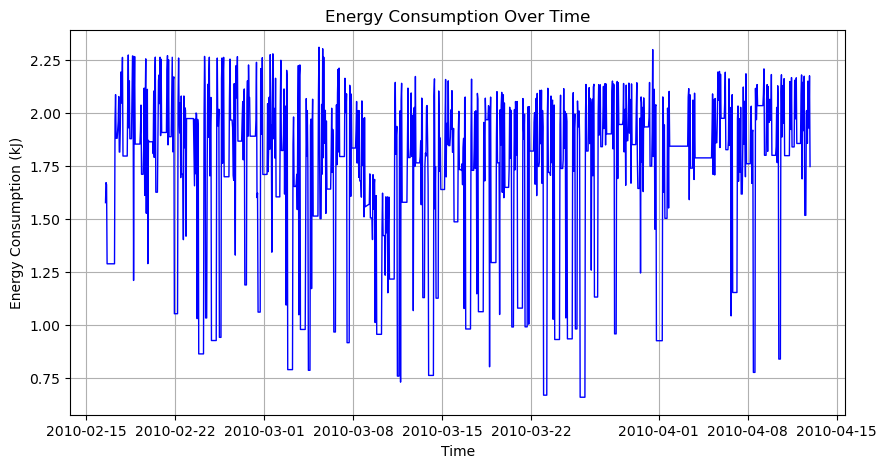

In [174]:
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
combined_df["timestamp"] = pd.to_datetime(combined_df["timestamp"])

# Plot Energy Consumption Over Time
plt.figure(figsize=(10, 5))
plt.plot(combined_df["timestamp"], combined_df["Energy_Consumption"], color="blue", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kJ)")
plt.title("Energy Consumption Over Time")
plt.grid(True)
plt.show()

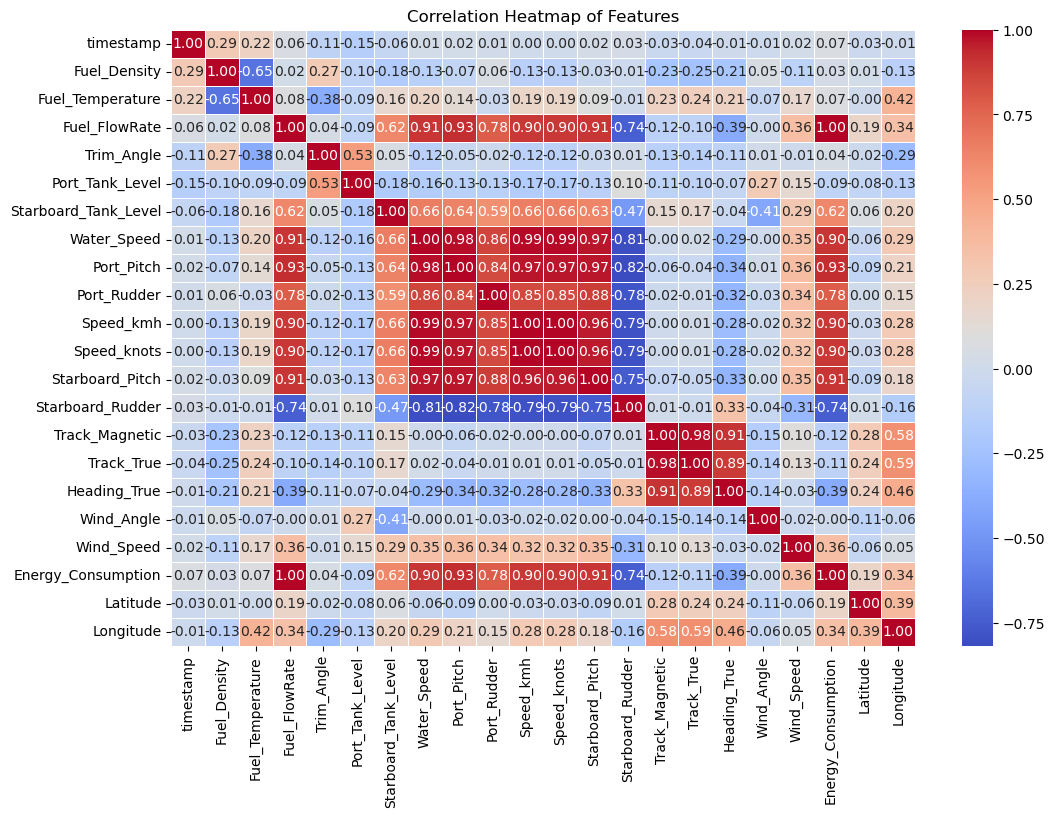

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Compute correlation matrix
corr_matrix = combined_df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop unnecessary features
excluded_features = ["Fuel_Density", "Fuel_FlowRate", "timestamp", "Wind_Angle", "Trim_Angle", 
                     "Port_Pitch", "Speed_kmh", "Speed_knots", "Water_Speed", "Latitude", 
                     "Track_Magnetic", "Track_True", "Wind_Speed"]

# Select relevant features (excluding Energy Consumption as target)
feature_columns = [col for col in combined_df.columns if col not in excluded_features + ["Energy_Consumption"]]

X = combined_df[feature_columns]
y = combined_df["Energy_Consumption"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [180]:
print("Missing values in X_train:", np.isnan(X_train).sum().sum())
print("Missing values in X_test:", np.isnan(X_test).sum().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())

Missing values in X_train: 3574
Missing values in X_test: 868
Infinite values in X_train: 0
Infinite values in X_test: 0


In [182]:
# Replace NaN values with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Verify that missing values are gone
print("Missing values in X_train after filling:", X_train.isna().sum().sum())
print("Missing values in X_test after filling:", X_test.isna().sum().sum())

Missing values in X_train after filling: 0
Missing values in X_test after filling: 0


In [184]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Train Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_rfr = rfr.predict(X_test_scaled)

In [188]:
# Model evaluation function
def assess_model(true_values, predictions, model_label):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    print(f"\n🔹 {model_label} Performance Metrics:")
    print(f"📌 MAE: {mae:.4f}")
    print(f"📌 RMSE: {rmse:.4f}")
    print(f"📌 R² Score: {r2:.4f}")

# Evaluate both models
assess_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")
assess_model(y_test, y_pred_rfr, "Random Forest Regressor")


🔹 Gradient Boosting Regressor Performance Metrics:
📌 MAE: 0.1423
📌 RMSE: 0.2109
📌 R² Score: 0.7584

🔹 Random Forest Regressor Performance Metrics:
📌 MAE: 0.0916
📌 RMSE: 0.1653
📌 R² Score: 0.8516
